
##### M13_Challenge_KonradK_venture_funding_with_deep_learning.ipynb
## Konrad Kozicki
### UCB-VIRT-FIN-PT-12-2020-U-B-TTH
# Module 13 Challenge Submission - Sandbox_11
---

# Venture Funding with Deep Learning


In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(
    Path("./Resources/applicants_data.csv")
)

# # Review the DataFrame
# applicant_data_df.head()

In [3]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

>>>> 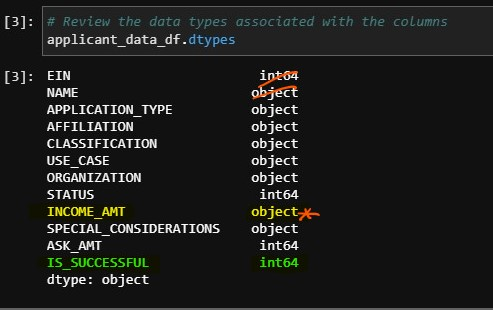

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns = ["EIN", "NAME"])

# Review the DataFrame
applicant_data_df[:15]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [5]:
# Drop the other columns from the DataFrame as needed
applicant_data_df_cropped = applicant_data_df.drop(columns = ["SPECIAL_CONSIDERATIONS"])


#.drop(columns = ["AFFILIATION", "APPLICATION_TYPE", "CLASSIFICATION", "ORGANIZATION", "INCOME_AMT", "ASK_AMT", "STATUS", "USE_CASE", "SPECIAL_CONSIDERATIONS"])

# # Review the DataFrame
applicant_data_df_cropped[:15]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0


In [6]:
# Create a list of categorical variables 
categorical_variables_cropped = list(applicant_data_df_cropped.dtypes[applicant_data_df_cropped.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables_cropped

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [8]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df_cropped[categorical_variables_cropped])

In [9]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables_cropped)
)

# # Review the DataFrame
# encoded_df.head()

In [10]:
numerical_variables_df = applicant_data_df_cropped.drop(columns = categorical_variables_cropped
                                                       )

# # Review the DataFrame
# numerical_variables_df.head()

In [11]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
fully_encoded_df = pd.concat(
    [
        numerical_variables_df,
        encoded_df
    ],
    axis=1
)

# # Review the Dataframe
# fully_encoded_df.head()

In [12]:
applicant_data_df_cropped.dtypes

APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
STATUS               int64
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [13]:
fully_encoded_df.dtypes

STATUS                      int64
ASK_AMT                     int64
IS_SUCCESSFUL               int64
APPLICATION_TYPE_T10      float64
APPLICATION_TYPE_T12      float64
                           ...   
INCOME_AMT_10M-50M        float64
INCOME_AMT_1M-5M          float64
INCOME_AMT_25000-99999    float64
INCOME_AMT_50M+           float64
INCOME_AMT_5M-10M         float64
Length: 115, dtype: object

In [14]:
# Define the target set y using the IS_SUCCESSFUL column
y = fully_encoded_df["IS_SUCCESSFUL"]

# # Display a sample of y
# y[:5]

In [15]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = fully_encoded_df.drop(columns=["IS_SUCCESSFUL"])


# # Review the features DataFrame
# X.head()

In [16]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [17]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


# Alternative Model 5+

In [18]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [19]:
# Define the number of neurons in the output layer
number_output_neurons_A5 = 1

In [20]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A5 =  (number_input_features + number_output_neurons_A5) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A5

57

In [21]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A5 =  (hidden_nodes_layer1_A5 + number_output_neurons_A5) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A5

29

In [22]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A5 =  (hidden_nodes_layer2_A5 + number_output_neurons_A5) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A5

15

In [23]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A5 =  (hidden_nodes_layer3_A5 + number_output_neurons_A5) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A5

8

In [24]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A5 =  (hidden_nodes_layer4_A5 + number_output_neurons_A5) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A5

4

In [25]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A5 =  (hidden_nodes_layer5_A5 + number_output_neurons_A5) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A5

2

In [26]:
# Create and Display the Sequential Model Instance 
# for Model A5
nn_A5 = Sequential() 

# Add the first hidden layer
nn_A5.add(Dense(units=hidden_nodes_layer1_A5, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A5.add(Dense(units=hidden_nodes_layer2_A5, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A5.add(Dense(units=hidden_nodes_layer3_A5, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A5.add(Dense(units=hidden_nodes_layer4_A5, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A5.add(Dense(units=hidden_nodes_layer5_A5, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A5.add(Dense(units=hidden_nodes_layer6_A5, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A5.add(Dense(units=number_output_neurons_A5, activation="sigmoid"))

# Display the Sequential model summary
nn_A5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 57)                6555      
_________________________________________________________________
dense_1 (Dense)              (None, 29)                1682      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                450       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3

In [27]:
# Compile the Sequential model
nn_A5.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [28]:
# Fit the model using 50 epochs and the training data
fit_model_A5 = nn_A5.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2460 - accuracy: 0.5342 - val_loss: 0.2049 - val_accuracy: 0.7339
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2085 - accuracy: 0.7208 - val_loss: 0.1950 - val_accuracy: 0.7352
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1988 - accuracy: 0.7231 - val_loss: 0.1923 - val_accuracy: 0.7332
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1957 - accuracy: 0.7238 - val_loss: 0.1913 - val_accuracy: 0.7324
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1928 - accuracy: 0.7241 - val_loss: 0.1886 - val_accuracy: 0.7370
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1915 - accuracy: 0.7281 - val_loss: 0.1886 - val_accuracy: 0.7367
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1905 - accuracy: 0.7309 - val_loss: 0.1895 - val_accuracy: 0.7363

In [29]:
print("Alternative Model 5 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A5.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 5 Results
Loss: 0.18755599856376648, Accuracy: 0.7268804907798767


# Alternative Model 6+

In [30]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [31]:
# Define the number of neurons in the output layer
number_output_neurons_A6 = 1

In [32]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A6 =  (number_input_features + number_output_neurons_A6) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A6

57

In [33]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A6 =  (hidden_nodes_layer1_A6 + number_output_neurons_A6) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A6

29

In [34]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A6 =  (hidden_nodes_layer2_A6 + number_output_neurons_A6) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A6

15

In [35]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A6 =  (hidden_nodes_layer3_A6 + number_output_neurons_A6) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A6

8

In [36]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A6 =  (hidden_nodes_layer4_A6 + number_output_neurons_A6) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A6

4

In [37]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A6 =  (hidden_nodes_layer5_A6 + number_output_neurons_A6) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A6

2

In [38]:
# Create and Display the Sequential Model Instance 
# for Model A6
nn_A6 = Sequential() 

# Add the first hidden layer
nn_A6.add(Dense(units=hidden_nodes_layer1_A6, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A6.add(Dense(units=hidden_nodes_layer2_A6, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A6.add(Dense(units=hidden_nodes_layer3_A6, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A6.add(Dense(units=hidden_nodes_layer4_A6, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A6.add(Dense(units=hidden_nodes_layer5_A6, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A6.add(Dense(units=hidden_nodes_layer6_A6, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A6.add(Dense(units=number_output_neurons_A6, activation="sigmoid"))

# Display the Sequential model summary
nn_A6.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 57)                6555      
_________________________________________________________________
dense_8 (Dense)              (None, 29)                1682      
_________________________________________________________________
dense_9 (Dense)              (None, 15)                450       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [39]:
# Compile the Sequential model
nn_A6.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [40]:
# Fit the model using 50 epochs and the training data
fit_model_A6 = nn_A6.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2305 - accuracy: 0.6153 - val_loss: 0.1993 - val_accuracy: 0.7378
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2018 - accuracy: 0.7250 - val_loss: 0.1927 - val_accuracy: 0.7349
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1958 - accuracy: 0.7219 - val_loss: 0.1909 - val_accuracy: 0.7375
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1921 - accuracy: 0.7270 - val_loss: 0.1895 - val_accuracy: 0.7374
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1915 - accuracy: 0.7311 - val_loss: 0.1905 - val_accuracy: 0.7296
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1918 - accuracy: 0.7265 - val_loss: 0.1875 - val_accuracy: 0.7358
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1887 - accuracy: 0.7296 - val_loss: 0.1852 - val_accuracy: 0.7361

In [41]:
print("Alternative Model 6 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A6.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 6 Results
Loss: 0.18635965883731842, Accuracy: 0.7285131216049194


# Alternative Model 7+

In [42]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [43]:
# Define the number of neurons in the output layer
number_output_neurons_A7 = 1

In [44]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A7 =  (number_input_features + number_output_neurons_A7) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A7

57

In [45]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A7 =  (hidden_nodes_layer1_A7 + number_output_neurons_A7) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A7

29

In [46]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A7 =  (hidden_nodes_layer2_A7 + number_output_neurons_A7) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A7

15

In [47]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A7 =  (hidden_nodes_layer3_A7 + number_output_neurons_A7) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A7

8

In [48]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A7 =  (hidden_nodes_layer4_A7 + number_output_neurons_A7) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A7

4

In [49]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A7 =  (hidden_nodes_layer5_A7 + number_output_neurons_A7) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A7

2

In [50]:
# Create and Display the Sequential Model Instance 
# for Model A7
nn_A7 = Sequential() 

# Add the first hidden layer
nn_A7.add(Dense(units=hidden_nodes_layer1_A7, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A7.add(Dense(units=hidden_nodes_layer2_A7, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A7.add(Dense(units=hidden_nodes_layer3_A7, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A7.add(Dense(units=hidden_nodes_layer4_A7, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A7.add(Dense(units=hidden_nodes_layer5_A7, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A7.add(Dense(units=hidden_nodes_layer6_A7, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A7.add(Dense(units=number_output_neurons_A7, activation="sigmoid"))

# Display the Sequential model summary
nn_A7.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_15 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_16 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [51]:
# Compile the Sequential model
nn_A7.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [52]:
# Fit the model using 50 epochs and the training data
fit_model_A7 = nn_A7.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2284 - accuracy: 0.6688 - val_loss: 0.1994 - val_accuracy: 0.7356
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1976 - accuracy: 0.7244 - val_loss: 0.1901 - val_accuracy: 0.7353
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1911 - accuracy: 0.7283 - val_loss: 0.1857 - val_accuracy: 0.7423
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1890 - accuracy: 0.7291 - val_loss: 0.1842 - val_accuracy: 0.7388
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1879 - accuracy: 0.7315 - val_loss: 0.1840 - val_accuracy: 0.7415
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1872 - accuracy: 0.7298 - val_loss: 0.1826 - val_accuracy: 0.7422
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1863 - accuracy: 0.7306 - val_loss: 0.1832 - val_accuracy: 0.7418

In [53]:
print("Alternative Model 7 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A7.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 7 Results
Loss: 0.18598486483097076, Accuracy: 0.7292128205299377


# Alternative Model 8+

In [54]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [55]:
# Define the number of neurons in the output layer
number_output_neurons_A8 = 1

In [56]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A8 =  (number_input_features + number_output_neurons_A8) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A8

57

In [57]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A8 =  (hidden_nodes_layer1_A8 + number_output_neurons_A8) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A8

29

In [58]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A8 =  (hidden_nodes_layer2_A8 + number_output_neurons_A8) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A8

15

In [59]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A8 =  (hidden_nodes_layer3_A8 + number_output_neurons_A8) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A8

8

In [60]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A8 =  (hidden_nodes_layer4_A8 + number_output_neurons_A8) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A8

4

In [61]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A8 =  (hidden_nodes_layer5_A8 + number_output_neurons_A8) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A8

2

In [62]:
# Create and Display the Sequential Model Instance 
# for Model A8
nn_A8 = Sequential() 

# Add the first hidden layer
nn_A8.add(Dense(units=hidden_nodes_layer1_A8, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A8.add(Dense(units=hidden_nodes_layer2_A8, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A8.add(Dense(units=hidden_nodes_layer3_A8, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A8.add(Dense(units=hidden_nodes_layer4_A8, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A8.add(Dense(units=hidden_nodes_layer5_A8, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A8.add(Dense(units=hidden_nodes_layer6_A8, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A8.add(Dense(units=number_output_neurons_A8, activation="sigmoid"))

# Display the Sequential model summary
nn_A8.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_22 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_23 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [63]:
# Compile the Sequential model
nn_A8.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [64]:
# Fit the model using 50 epochs and the training data
fit_model_A8 = nn_A8.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2276 - accuracy: 0.6639 - val_loss: 0.2009 - val_accuracy: 0.7324
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.2000 - accuracy: 0.7213 - val_loss: 0.1923 - val_accuracy: 0.7354
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1936 - accuracy: 0.7251 - val_loss: 0.1870 - val_accuracy: 0.7402
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1927 - accuracy: 0.7269 - val_loss: 0.1864 - val_accuracy: 0.7357
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1882 - accuracy: 0.7276 - val_loss: 0.1840 - val_accuracy: 0.7388
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1869 - accuracy: 0.7311 - val_loss: 0.1848 - val_accuracy: 0.7365
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1854 - accuracy: 0.7354 - val_loss: 0.1840 - val_accuracy: 0.7371

In [65]:
print("Alternative Model 8 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A8.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 8 Results
Loss: 0.18567106127738953, Accuracy: 0.7295626997947693


# Alternative Model 9+

In [66]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [67]:
# Define the number of neurons in the output layer
number_output_neurons_A9 = 1

In [68]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A9 =  (number_input_features + number_output_neurons_A9) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A9

57

In [69]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A9 =  (hidden_nodes_layer1_A9 + number_output_neurons_A9) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A9

29

In [70]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A9 =  (hidden_nodes_layer2_A9 + number_output_neurons_A9) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A9

15

In [71]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A9 =  (hidden_nodes_layer3_A9 + number_output_neurons_A9) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A9

8

In [72]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A9 =  (hidden_nodes_layer4_A9 + number_output_neurons_A9) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A9

4

In [73]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A9 =  (hidden_nodes_layer5_A9 + number_output_neurons_A9) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A9

2

In [74]:
# Create and Display the Sequential Model Instance 
# for Model A9
nn_A9 = Sequential() 

# Add the first hidden layer
nn_A9.add(Dense(units=hidden_nodes_layer1_A9, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A9.add(Dense(units=hidden_nodes_layer2_A9, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A9.add(Dense(units=hidden_nodes_layer3_A9, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A9.add(Dense(units=hidden_nodes_layer4_A9, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A9.add(Dense(units=hidden_nodes_layer5_A9, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A9.add(Dense(units=hidden_nodes_layer6_A9, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A9.add(Dense(units=number_output_neurons_A9, activation="sigmoid"))

# Display the Sequential model summary
nn_A9.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_29 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_30 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_34 (Dense)             (None, 1)                

In [75]:
# Compile the Sequential model
nn_A9.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [76]:
# Fit the model using 50 epochs and the training data
fit_model_A9 = nn_A9.fit(X_train_scaled, y_train, validation_split=0.3, epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2291 - accuracy: 0.6581 - val_loss: 0.2016 - val_accuracy: 0.7321
Epoch 2/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1995 - accuracy: 0.7231 - val_loss: 0.1903 - val_accuracy: 0.7400
Epoch 3/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1938 - accuracy: 0.7261 - val_loss: 0.1888 - val_accuracy: 0.7363
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1895 - accuracy: 0.7313 - val_loss: 0.1852 - val_accuracy: 0.7394
Epoch 5/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1864 - accuracy: 0.7349 - val_loss: 0.1842 - val_accuracy: 0.7418
Epoch 6/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1908 - accuracy: 0.7234 - val_loss: 0.1833 - val_accuracy: 0.7397
Epoch 7/100
563/563 [==============================] - 1s 1ms/step - loss: 0.1868 - accuracy: 0.7277 - val_loss: 0.1846 - val_accuracy: 0.7378

In [77]:
print("Alternative Model 9 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A9.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 9 Results
Loss: 0.1856829673051834, Accuracy: 0.7294460535049438


---
---

### Step 2: After completing your models, display the accuracy scores achieved by each model, and compare the results.

In [78]:
print("Alternative Model 5 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A5.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 5 Results
Loss: 0.18755599856376648, Accuracy: 0.7268804907798767


<AxesSubplot:title={'center':'model_accuracy: A5'}>

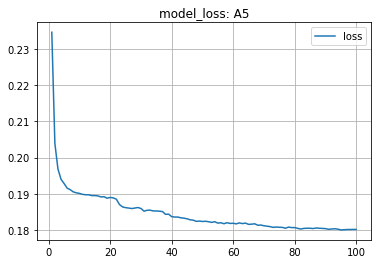

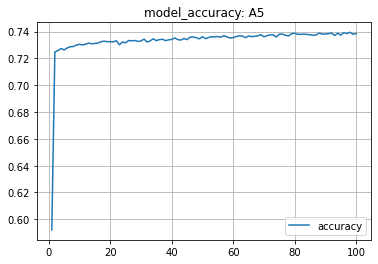

In [79]:
model_plot = pd.DataFrame(fit_model_A5.history, index=range(1, len(fit_model_A5.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A5")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A5")

In [80]:
print("Alternative Model 6 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A6.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 6 Results
Loss: 0.18635965883731842, Accuracy: 0.7285131216049194


<AxesSubplot:title={'center':'model_accuracy: A6'}>

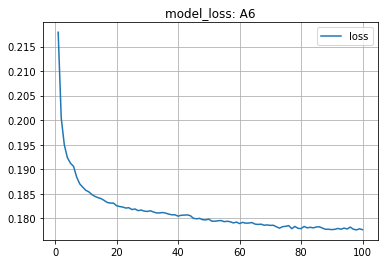

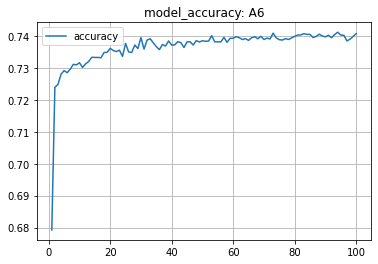

In [81]:
model_plot = pd.DataFrame(fit_model_A6.history, index=range(1, len(fit_model_A6.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A6")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A6")

In [82]:
print("Alternative Model 7 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A7.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 7 Results
Loss: 0.18598486483097076, Accuracy: 0.7292128205299377


<AxesSubplot:title={'center':'model_accuracy: A7'}>

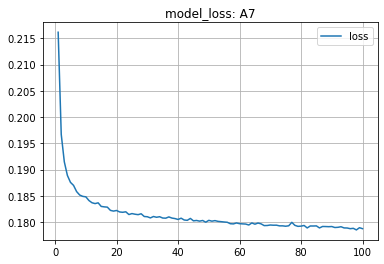

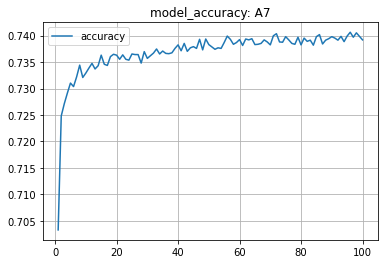

In [83]:
model_plot = pd.DataFrame(fit_model_A7.history, index=range(1, len(fit_model_A7.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A7")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A7")

In [84]:
print("Alternative Model 8 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A8.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 8 Results
Loss: 0.18567106127738953, Accuracy: 0.7295626997947693


<AxesSubplot:title={'center':'model_accuracy: A8'}>

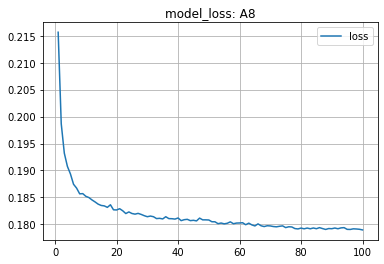

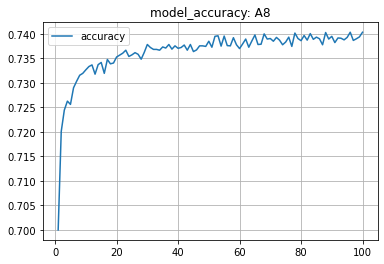

In [85]:
model_plot = pd.DataFrame(fit_model_A8.history, index=range(1, len(fit_model_A8.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A8")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A8")

In [86]:
print("Alternative Model 9 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A9.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 9 Results
Loss: 0.1856829673051834, Accuracy: 0.7294460535049438


<AxesSubplot:title={'center':'model_accuracy: A9'}>

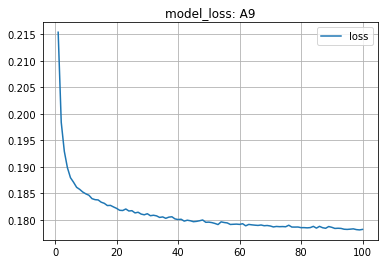

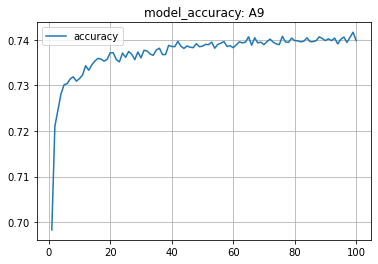

In [87]:
model_plot = pd.DataFrame(fit_model_A9.history, index=range(1, len(fit_model_A9.history["loss"]) + 1))
model_plot.plot(y="loss", title="model_loss: A9", grid=True)
model_plot.plot(y="accuracy", title="model_accuracy: A9", grid=True)

### Step 2(b): Plot and Compare the Results of each Alternative Model

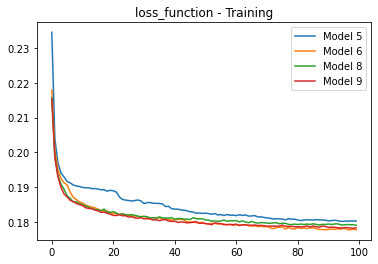

In [88]:
# Day 14-2 cell [62]
plt.plot(fit_model_A5.history["loss"])
plt.plot(fit_model_A6.history["loss"])
# plt.plot(fit_model_A7.history["loss"])
plt.plot(fit_model_A8.history["loss"])
plt.plot(fit_model_A9.history["loss"])

plt.title("loss_function - Training")
plt.legend(["Model 5",
            "Model 6",
#             "Model 7",
            "Model 8",
            "Model 9"
           ])
plt.show()

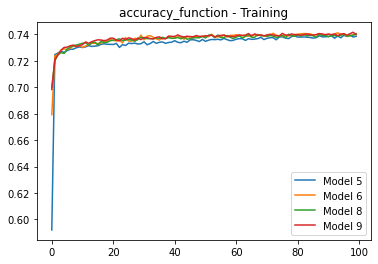

In [89]:
# Day 14-2 cell [62]
plt.plot(fit_model_A5.history["accuracy"])
plt.plot(fit_model_A6.history["accuracy"])
# plt.plot(fit_model_A7.history["accuracy"])
plt.plot(fit_model_A8.history["accuracy"])
plt.plot(fit_model_A9.history["accuracy"])

plt.title("accuracy_function - Training")
plt.legend(["Model 5",
            "Model 6",
#             "Model 7",
            "Model 8",
            "Model 9"
           ])
plt.show()

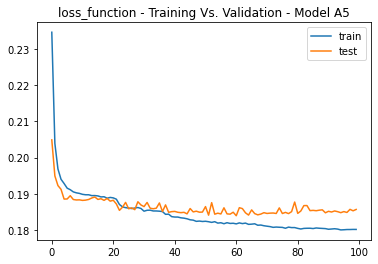

In [90]:
# Train vs test for shallow net
plt.plot(fit_model_A5.history["loss"])
plt.plot(fit_model_A5.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A5")
plt.legend(["train", "test"])
plt.show()

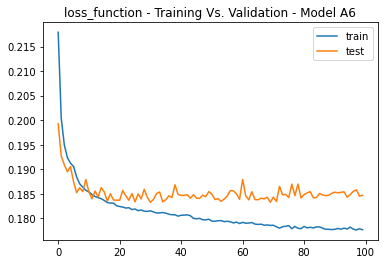

In [91]:
# Train vs test for deep net
plt.plot(fit_model_A6.history["loss"])
plt.plot(fit_model_A6.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A6")
plt.legend(["train", "test"])
plt.show()

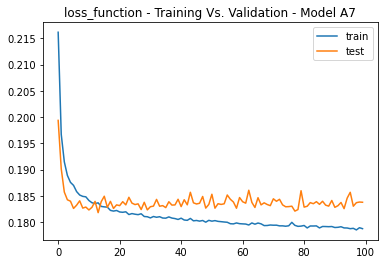

In [92]:
# Train vs test for deep net
plt.plot(fit_model_A7.history["loss"])
plt.plot(fit_model_A7.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A7")
plt.legend(["train", "test"])
plt.show()

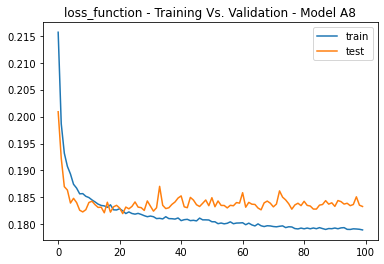

In [93]:
# Train vs test for deep net
plt.plot(fit_model_A8.history["loss"])
plt.plot(fit_model_A8.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A8")
plt.legend(["train", "test"])
plt.show()

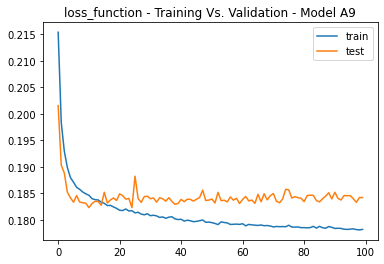

In [94]:
# Train vs test for deep net
plt.plot(fit_model_A9.history["loss"])
plt.plot(fit_model_A9.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - Model A9")
plt.legend(["train", "test"])
plt.show()

# ================================

### Step 3: Save each of your alternative models as an HDF5 file.


In [95]:
# Set the file path for the fifth alternative model
file_path = Path("./Resources/AlphabetSoup_A10.h5")
# Export your model to a HDF5 file
nn_A5.save(file_path)

In [96]:
# Set the file path for the sixth alternative model
file_path = Path("./Resources/AlphabetSoup_A11.h5")
# Export your model to a HDF5 file
nn_A6.save(file_path)

In [97]:
# Set the file path for the seventh alternative model
file_path = Path("./Resources/AlphabetSoup_A12.h5")
# Export your model to a HDF5 file
nn_A7.save(file_path)

In [98]:
# Set the file path for the eighth alternative model
file_path = Path("./Resources/AlphabetSoup_A13.h5")
# Export your model to a HDF5 file
nn_A8.save(file_path)

In [99]:
# Set the file path for the ninth alternative model
file_path = Path("./Resources/AlphabetSoup_A14.h5")
# Export your model to a HDF5 file
nn_A9.save(file_path)